# Exploratory Data Analysis (EDA)

## Load Libraries

Load needed libraries.

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')

## Dataset

TODO: Describe datase

## Load Dataset

Load datasets from two different sources and combine them in one data frame.

In [2]:
# Paths to datasets
data_path = '../data/combined.csv'

# Combine datasets from different sources
df = pd.read_csv(data_path)
df.head()

,owner,name,sshUrl,url,stars,createdAt,pushedAt,packages,pkgGroupId,pkgArtifactId,...,prCreatedAt,prPublishedAt,prMergedAt,prClosedAt,baseRepo,baseRef,baseRefPrefix,headRepo,headRef,headRefPrefix
0,javaparser,javaparser,ssh://git@github.com:javaparser/javaparser.git,https://github.com/javaparser/javaparser,4290,2011-10-30,2022-07-27,5,com.github.javaparser,javaparser-symbol-solver-core,...,2022-06-10,2022-06-10,NaN,NaN,javaparser/javaparser,master,refs/heads/,yufanyufan/javaparser,patch-1,refs/heads/
1,javaparser,javaparser,ssh://git@github.com:javaparser/javaparser.git,https://github.com/javaparser/javaparser,4290,2011-10-30,2022-07-27,5,com.github.javaparser,javaparser-symbol-solver-core,...,2022-06-10,2022-06-10,NaN,NaN,javaparser/javaparser,master,refs/heads/,yufanyufan/javaparser,patch-1,refs/heads/
2,javaparser,javaparser,ssh://git@github.com:javaparser/javaparser.git,https://github.com/javaparser/javaparser,4290,2011-10-30,2022-07-27,5,com.github.javaparser,javaparser-symbol-solver-core,...,2022-06-10,2022-06-10,NaN,NaN,javaparser/javaparser,master,refs/heads/,yufanyufan/javaparser,patch-1,refs/heads/
3,javaparser,javaparser,ssh://git@github.com:javaparser/javaparser.git,https://github.com/javaparser/javaparser,4290,2011-10-30,2022-07-27,5,com.github.javaparser,javaparser-symbol-solver-core,...,2022-06-10,2022-06-10,NaN,NaN,javaparser/javaparser,master,refs/heads/,yufanyufan/javaparser,patch-1,refs/heads/
4,javaparser,javaparser,ssh://git@github.com:javaparser/javaparser.git,https://github.com/javaparser/javaparser,4290,2011-10-30,2022-07-27,5,com.github.javaparser,javaparser-symbol-solver-core,...,2022-06-10,2022-06-10,NaN,NaN,javaparser/javaparser,master,refs/heads/,yufanyufan/javaparser,patch-1,refs/heads/


### Descriptive Statistics

In [3]:
df.describe()

,stars,packages,pkgClients,pkgRelevantClients,cstars,prNumber,prModifiedFiles,prMergedAt,prClosedAt
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,0.0,0.0
mean,10331.917025,22.663697,55363.814033,50.486538,2296.250225,4134.207887,12.183165,NaN,NaN
std,6171.908505,25.649645,91682.465291,40.406052,5361.331098,4402.893153,21.897447,NaN,NaN
min,2579.000000,2.000000,2.000000,1.000000,100.000000,195.000000,1.000000,NaN,NaN
25%,4595.000000,3.000000,2315.000000,17.000000,170.000000,1885.000000,2.000000,NaN,NaN
50%,10571.000000,12.000000,14622.000000,37.000000,382.000000,3094.000000,4.000000,NaN,NaN
75%,11345.000000,41.000000,59373.000000,96.000000,1447.000000,4372.000000,11.000000,NaN,NaN
max,29871.000000,100.000000,371952.000000,110.000000,37707.000000,21909.000000,100.000000,NaN,NaN


**Number of library repositories**

The dataset contains information about **64** different **library repositories**.

In [ ]:
df.groupby(['owner', 'name']).size()

owner          name         
Activiti       Activiti          18
AxonFramework  AxonFramework     21
JCTools        JCTools           23
LWJGL          lwjgl3             8
OpenFeign      feign              6
                               ... 
square         javapoet         532
stanfordnlp    CoreNLP           18
swagger-api    swagger-core     176
trinodb        trino             70
xuxueli        xxl-job          184
Length: 64, dtype: int64

**Number of library repository packages**

The dataset contains information about **162** different **package releases** of library repositories.

In [73]:
df.groupby(['owner', 'name', 'pkgGroupId', 'pkgArtifactId', 'pkgVersion']).size()

owner          name           pkgGroupId         pkgArtifactId          pkgVersion    
Activiti       Activiti       org.activiti       activiti-spring        7.1.0-SNAPSHOT     18
AxonFramework  AxonFramework  org.axonframework  axon-configuration     4.6.0-SNAPSHOT      4
                                                 axon-eventsourcing     4.6.0-SNAPSHOT      1
                                                 axon-integrationtests  4.6.0-SNAPSHOT      2
                                                 axon-messaging         4.6.0-SNAPSHOT      4
                                                                                         ... 
trinodb        trino          io.trino           trino-mongodb          393-SNAPSHOT        2
                                                 trino-parser           393-SNAPSHOT        1
                                                 trino-pinot            393-SNAPSHOT        9
                                                 trino-tests       

**Number of client repositories**

The dataset contains information about **907** different **client repositories**.

In [74]:
df.groupby(['cowner', 'cname']).size()

cowner       cname             
1228857713   jvmOnJava              3
201206030    novel                 11
373675032    moti-blog              5
58code       Argo                   5
648540858    wvp-GB28181-pro       25
                                   ..
zsoltherpai  feather                5
             fluent-jdbc            5
zuihou       lamp-cloud             1
             lamp-util             10
zzzzzzzzyt   zeng-rpc-framework    21
Length: 907, dtype: int64

**Number of pull requests**

The dataset contains information about **681** different **pull requests**.

In [75]:
df.groupby(['owner', 'name', 'prNumber']).size()

owner          name           prNumber
Activiti       Activiti       3912.0      18
AxonFramework  AxonFramework  2209.0       3
                              2239.0       4
                              2258.0       2
                              2266.0       1
                                          ..
xuxueli        xxl-job        2860.0      23
                              2862.0      23
                              2864.0      23
                              2865.0      23
                              2935.0      23
Length: 681, dtype: int64

**Distribution and spread of the numerical features**

Text(0, 0.5, 'Modified files')

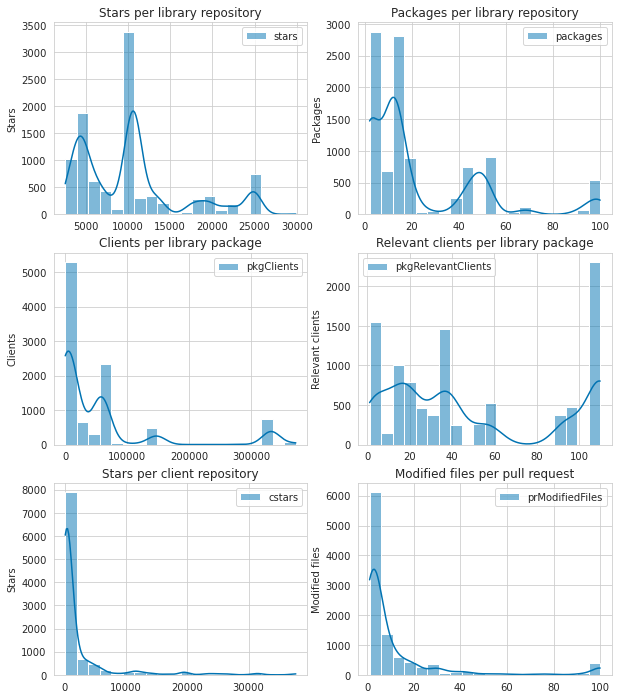

In [65]:
fig, ax = plt.subplots(nrows=3, ncols=2, squeeze=True, figsize=(10, 12))

sns.histplot(df[['stars']], kde=True, bins=20, color='#56B4E9', ax=ax[0, 0])
sns.histplot(df[['packages']], kde=True, bins=20, color='#56B4E9', ax=ax[0, 1])
sns.histplot(df[['pkgClients']], kde=True, bins=20, color='#009E73', ax=ax[1, 0])
sns.histplot(df[['pkgRelevantClients']], kde=True, bins=20, color='#009E73', ax=ax[1, 1])
sns.histplot(df[['cstars']], kde=True, bins=20, color='#F0E442', ax=ax[2, 0])
sns.histplot(df[['prModifiedFiles']], kde=True, bins=20, color='#0072B2', ax=ax[2, 1])

ax[0, 0].set_title('Stars per library repository')
ax[0, 1].set_title('Packages per library repository')
ax[1, 0].set_title('Clients per library package')
ax[1, 1].set_title('Relevant clients per library package')
ax[2, 0].set_title('Stars per client repository')
ax[2, 1].set_title('Modified files per pull request')

ax[0, 0].set_ylabel('Stars')
ax[0, 1].set_ylabel('Packages')
ax[1, 0].set_ylabel('Clients')
ax[1, 1].set_ylabel('Relevant clients')
ax[2, 0].set_ylabel('Stars')
ax[2, 1].set_ylabel('Modified files')

Text(0, 0.5, 'Modified files')

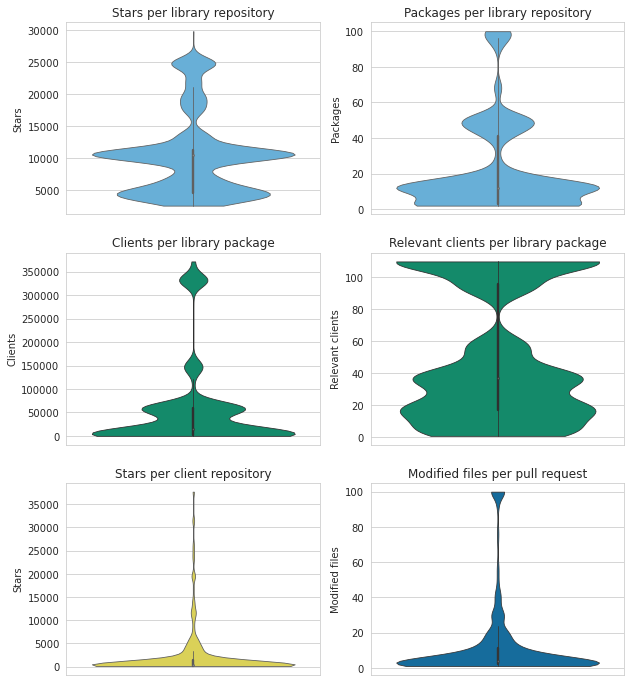

In [61]:
fig, ax = plt.subplots(nrows=3, ncols=2, squeeze=True, figsize=(10, 12))

sns.violinplot(data=df, y='stars', cut=0, color='#56B4E9', alpha=0.5, linewidth=0.8, ax=ax[0, 0])
sns.violinplot(data=df, y='packages', cut=0, color='#56B4E9', linewidth=0.8, ax=ax[0, 1])
sns.violinplot(data=df, y='pkgClients', cut=0, color='#009E73', linewidth=0.8, ax=ax[1, 0])
sns.violinplot(data=df, y='pkgRelevantClients', cut=0, color='#009E73', linewidth=0.8, ax=ax[1, 1])
sns.violinplot(data=df, y='cstars', cut=0, color='#F0E442', linewidth=0.8, ax=ax[2, 0])
sns.violinplot(data=df, y='prModifiedFiles', cut=0, color='#0072B2', linewidth=0.8, ax=ax[2, 1])

ax[0, 0].set_title('Stars per library repository')
ax[0, 1].set_title('Packages per library repository')
ax[1, 0].set_title('Clients per library package')
ax[1, 1].set_title('Relevant clients per library package')
ax[2, 0].set_title('Stars per client repository')
ax[2, 1].set_title('Modified files per pull request')

ax[0, 0].set_ylabel('Stars')
ax[0, 1].set_ylabel('Packages')
ax[1, 0].set_ylabel('Clients')
ax[1, 1].set_ylabel('Relevant clients')
ax[2, 0].set_ylabel('Stars')
ax[2, 1].set_ylabel('Modified files')